In [35]:
import matplotlib.pyplot as plt
import pandas as p
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy.stats import linregress
# from scipy.spatial import distance
from matplotlib import colors
import scipy
# import os
# import copy
# import matplotlib.gridspec as gridspec
# from matplotlib.backends.backend_pdf import PdfPages

# from ast import literal_eval
# from Bio import SeqIO
# from itertools import combinations

# import Levenshtein

sns.set_color_codes()
sns.set_style('white')
sns.set_style('ticks')





In [36]:
plate_csvs = ['dna_quant_EvolvingFrontWGS_Plate1_31Jan2022.csv',
               'dna_quant_EvolvingFrontWGS_Plate2_31Jan2022.csv',
               'dna_quant_EvolvingFrontWGS_Plate3_31Jan2022.csv',
               'dna_quant_EvolvingFrontWGS_Plate4_31Jan2022.csv']


controls = {'Plate4-F1':100,
            'Plate4-F2':50,
            'Plate4-F3':25,
            'Plate4-F4':15,
            'Plate4-F5':10,
            'Plate4-F6':7.5,
            'Plate4-F7':5,
            'Plate4-F8':4,
            'Plate4-F9':2,
            'Plate4-F10':1,
            'Plate4-F11':0.5,
            'Plate4-F12':0,
            'Plate4-G1':100,
            'Plate4-G2':50,
            'Plate4-G3':25,
            'Plate4-G4':15,
            'Plate4-G5':10,
            'Plate4-G6':7.5,
            'Plate4-G7':5,
            'Plate4-G8':4,
            'Plate4-G9':2,
            'Plate4-G10':1,
            'Plate4-G11':0.5,
            'Plate4-G12':0,
            'Plate4-H1':10,
            'Plate4-H2':8,
            'Plate4-H3':5,
            'Plate4-H4':4,
            'Plate4-H5':2.5,
            'Plate4-H6':1,
            'Plate4-H7':10,
            'Plate4-H8':8,
            'Plate4-H9':5,
            'Plate4-H10':4,
            'Plate4-H11':2.5,
            'Plate4-H12':1}

In [60]:
well_order = [f'{chr(65+r)}{c}' for r in range(8) for c in range(1,13) ]
sorting_wells = {b: i for i, b in enumerate(well_order)}

def extract_read_information(df,plate_name,rows_down=58,cols_over=1,n_reads=2):

    
    entries = []
    
    
    for row in range(8):
        for col in range(1,13):
            for read in range(n_reads):
                
                value = int(df.values[rows_down+row*(n_reads+1)+read,cols_over+col])

                entries.append([f'{plate_name}-{chr(65+row)}{col}',f'{chr(65+row)}',f'{col}',f'{read+1}',value])

    return p.DataFrame(entries,columns=['well','row','column','read','flourescence'])

In [61]:
big_df = p.DataFrame(columns=['well','row','column','read','flourescence'])

for plate_number,plate_csv in enumerate(plate_csvs):
    this_plate = p.read_csv(plate_csv,header=None)
    
    out_df = extract_read_information(this_plate,plate_name=f'Plate{plate_number+1}')
    
    big_df = big_df.merge(out_df,on=['well','row','column','read','flourescence'],how='outer')



In [62]:
big_df.groupby(['well']).mean()

,flourescence
well,
Plate1-A1,12626.0
Plate1-A10,14891.5
Plate1-A11,15886.5
Plate1-A12,19970.0
Plate1-A2,15176.0
...,...
Plate4-H5,4988.0
Plate4-H6,1321.5
Plate4-H7,21565.0


In [49]:
avgs = []

for well in np.unique(big_df['well'].values):
    this_well = big_df[big_df['well']==well]
    
    avg = np.mean(this_well['fluoresence'].values)
    
    avgs.append(this_well.values)

,well,row,column,read,value
0,Plate1-A1,A,1,1,12938
1,Plate1-A1,A,1,2,12314
2,Plate1-A2,A,2,1,15674
3,Plate1-A2,A,2,2,14678
4,Plate1-A3,A,3,1,10886
...,...,...,...,...,...
763,Plate4-H10,H,10,2,7966
764,Plate4-H11,H,11,1,2403
765,Plate4-H11,H,11,2,2758
766,Plate4-H12,H,12,1,1702


LinregressResult(slope=2344.504042607804, intercept=-1501.1203477926138, rvalue=0.9694359494229433, pvalue=1.2611920882119945e-18, stderr=112.1319139575983, intercept_stderr=732.2995257068134)


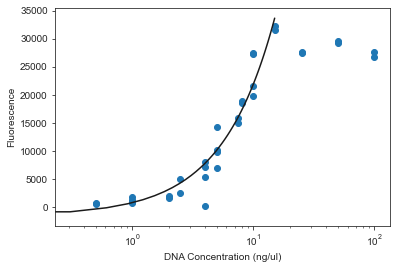

In [134]:
plt.scatter(controls.values(),big_df[big_df['well'].isin(controls)].groupby(['well'],sort=False).mean())
plt.xlabel('DNA Concentration (ng/ul)')
plt.ylabel('Fluorescence')



cutoff = 20

x_vals = np.asarray(list(controls.values()))
y_vals = np.asarray(big_df[big_df['well'].isin(controls)].groupby(['well'],sort=False).mean()['flourescence'])

cutoff_indices = np.where(x_vals<20)[0]
x_vals = x_vals[cutoff_indices]
y_vals = y_vals[cutoff_indices]

result = linregress(x=x_vals,y=y_vals)
x_space = np.linspace(0,15)
plt.plot(x_space,result.slope*x_space+result.intercept,color='k')

# plt.text(x=0,y=0.8,s=f'F={result.slope:.0g}*conc+{result.intercept:.0g}',transform=plt.gca().transAxes())

# plt.xlim(-0.1,cutoff)

print(result)
plt.xscale('log')
# plt.yscale('log')

plt.savefig('controls_plateReader_quantification.pdf',bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Concentration(ng/ul)')

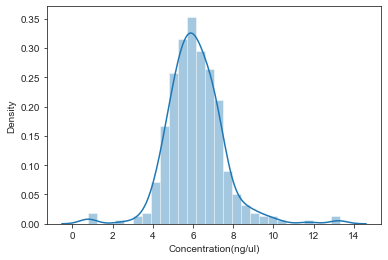

In [137]:
def concentration(fl_read,slope=result.slope,intercept=result.intercept):
    
    return (fl_read-intercept)/slope


# sns.distplot(concentration(big_df[~big_df['well'].isin(controls)].groupby(['well'],sort=False).mean()))
sns.distplot(concentration(big_df[~big_df['well'].isin(controls)].groupby(['well'],sort=False).mean()))


plt.xlabel('Concentration(ng/ul)')

In [ ]:
big_df[big_df['plate']]

In [95]:
len(big_df[big_df['well'].isin(controls)].groupby(['well'],sort=False).mean())

36

In [94]:
big_df[big_df['well'].isin(controls)].groupby(['well'],sort=False).mean()

,flourescence
well,
Plate4-F1,27663.5
Plate4-F2,29534.0
Plate4-F3,27610.5
Plate4-F4,32204.5
Plate4-F5,27328.5
Plate4-F6,15854.5
Plate4-F7,10217.0
Plate4-F8,337.5
Plate4-F9,1679.5


In [140]:
concentration(big_df[~big_df['well'].isin(controls)].groupby(['well'],sort=False).mean()).to_csv('EvolvingFront_WGS_gDNA_concentration.csv')